In [347]:
#technical analysis libary 
import ta
import pandas as pd
import numpy as np
from copy import deepcopy

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


#ta library doc https://technical-analysis-library-in-python.readthedocs.io/en/latest/
# https://buildmedia.readthedocs.org/media/pdf/technical-analysis-library-in-python/latest/technical-analysis-library-in-python.pdf
# https://towardsdatascience.com/technical-analysis-library-to-financial-datasets-with-pandas-python-4b2b390d3543


In [348]:
dfImport=pd.read_csv('127compiledDailyData127.csv')
ticker='SRTY'
dfImport=dfImport[dfImport['ticker']==ticker]

def accendingTimeOrder (df):
    ndf=df.iloc[::-1].reset_index().drop('index',axis=1)
    return ndf

dfImport=accendingTimeOrder(dfImport)
dfImport

,date,open,high,low,close,volume,ticker
0,2020-01-15,17.8300,17.830,17.2800,17.46,299773.0,SRTY
1,2020-01-16,17.0900,17.110,16.6811,16.78,435886.0,SRTY
2,2020-01-17,16.5600,17.028,16.5500,16.94,261083.0,SRTY
3,2020-01-21,17.1600,17.450,17.0900,17.35,210052.0,SRTY
4,2020-01-22,17.1900,17.480,17.0700,17.40,130126.0,SRTY
...,...,...,...,...,...,...,...
95,2020-06-02,12.3800,12.790,12.1700,12.30,6600797.0,SRTY
96,2020-06-03,11.7200,11.850,11.0900,11.41,9058773.0,SRTY
97,2020-06-04,11.6399,11.780,11.2150,11.46,8088398.0,SRTY
98,2020-06-05,9.9600,10.270,9.6500,10.13,11205729.0,SRTY


In [349]:
# MACD And Stochastic: A Double-Cross Strategy 
df=dfImport
df['stochOscillator']=ta.momentum.stoch(high=df["high"], low=df["low"], close=df["close"])
df['stochSignal']=ta.momentum.stoch_signal(high=df["high"], low=df["low"], close=df["close"])

In [350]:
df['macdLine']=ta.trend.macd(close=df['close'])
df['macdDiff']=ta.trend.macd_diff(close=df['close'])
df['macdSignal']=ta.trend.macd_signal(close=df['close'])

In [351]:
df

,date,open,high,low,close,volume,ticker,stochOscillator,stochSignal,macdLine,macdDiff,macdSignal
0,2020-01-15,17.8300,17.830,17.2800,17.46,299773.0,SRTY,NaN,NaN,NaN,NaN,NaN
1,2020-01-16,17.0900,17.110,16.6811,16.78,435886.0,SRTY,NaN,NaN,NaN,NaN,NaN
2,2020-01-17,16.5600,17.028,16.5500,16.94,261083.0,SRTY,NaN,NaN,NaN,NaN,NaN
3,2020-01-21,17.1600,17.450,17.0900,17.35,210052.0,SRTY,NaN,NaN,NaN,NaN,NaN
4,2020-01-22,17.1900,17.480,17.0700,17.40,130126.0,SRTY,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-06-02,12.3800,12.790,12.1700,12.30,6600797.0,SRTY,7.095279,10.210458,-2.615046,0.001950,-2.616996
96,2020-06-03,11.7200,11.850,11.0900,11.41,9058773.0,SRTY,2.819408,6.647300,-2.632849,-0.012682,-2.620166
97,2020-06-04,11.6399,11.780,11.2150,11.46,8088398.0,SRTY,3.982777,4.632488,-2.612804,0.005890,-2.618694
98,2020-06-05,9.9600,10.270,9.6500,10.13,11205729.0,SRTY,7.339450,4.713878,-2.673421,-0.043782,-2.629639


In [356]:
df['stochDiff']=df['stochOscillator']-df['stochSignal']
df['stochDiv']=df['stochDiff'].pct_change()+1
df['stochCross?'] = df['stochDiv'].apply(lambda x: 1 if x < 0 else 0)
df.loc[(df['stochCross?'] == 1) & (df['stochOscillator']>=80), 'stochSell?'] = 1 
df.loc[(df['stochCross?'] == 1) & (df['stochOscillator']<=20), 'stochBuy?'] = 1 

df['macdDiv']=df['macdLine'].pct_change()+1
df['macdCross0?'] = df['macdDiv'].apply(lambda x: 1 if x < 0 else 0)
df.loc[(df['macdCross0?'] == 1) & (df['macdLine']>0), 'macdBuy?'] = 1 
df.loc[(df['macdCross0?'] == 1) & (df['macdLine']<0), 'macdSell?'] = 1 

In [359]:
df.head()

,date,open,high,low,close,volume,ticker,stochOscillator,stochSignal,macdLine,...,macdSignal,stochDiff,stochDiv,stochCross?,stochSell?,stochBuy?,macdDiv,macdCross0?,macdBuy?,macdSell?
0,2020-01-15,17.83,17.830,17.2800,17.46,299773.0,SRTY,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN
1,2020-01-16,17.09,17.110,16.6811,16.78,435886.0,SRTY,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN
2,2020-01-17,16.56,17.028,16.5500,16.94,261083.0,SRTY,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN
3,2020-01-21,17.16,17.450,17.0900,17.35,210052.0,SRTY,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN
4,2020-01-22,17.19,17.480,17.0700,17.40,130126.0,SRTY,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN


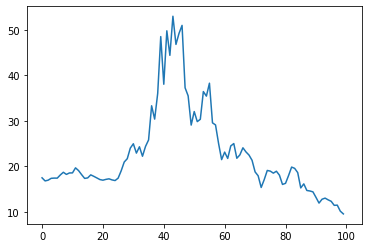

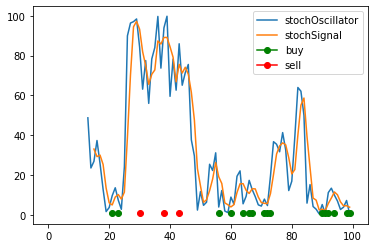

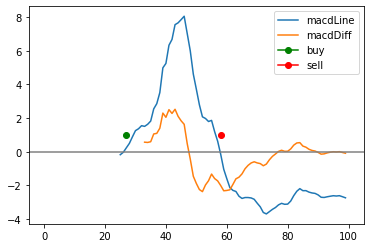

In [375]:
plt.figure()
plt.plot(df['close'])
plt.xlim([-5,105])

plt.figure()
plt.plot(df['stochOscillator'] , label='stochOscillator')
plt.plot(df['stochSignal'],label='stochSignal')
plt.plot(df['stochBuy?'],label='buy',marker='o', color='green')
plt.plot(df['stochSell?'],label='sell',marker='o', color='red')
plt.xlim([-5,105])
plt.legend()

plt.figure()
plt.plot(df['macdLine'] , label='macdLine')
plt.plot(df['macdDiff'],label='macdDiff')
plt.axhline(y=0, xmin=0, xmax=1, color='grey')
plt.plot(df['macdBuy?'],label='buy',marker='o', color='green')
plt.plot(df['macdSell?'],label='sell',marker='o', color='red')
plt.xlim([-5,105])
plt.legend()

In [361]:
def persistRecom(clIn, persist=6):
    cl=deepcopy(clIn)
    i=0
    while i < len(clIn):
        if (clIn[i]==1):
            cl[i:i+persist]=1
        i=i+1
    return cl

df['stochSellPersist']=persistRecom(df['stochSell?'])
df['stochBuyPersist']=persistRecom(df['stochBuy?'])
df['macdSellPersist']=persistRecom(df['macdSell?'])
df['macdBuyPersist']=persistRecom(df['macdBuy?'])

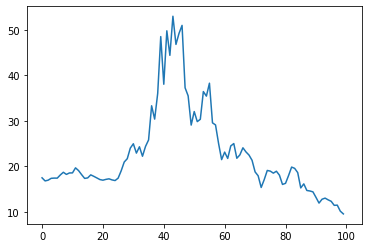

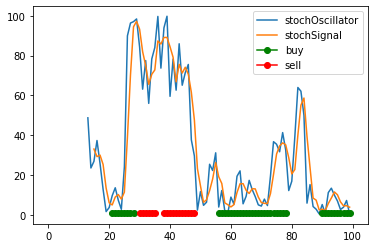

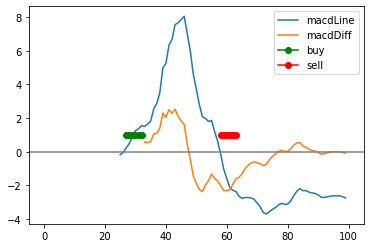

In [376]:
plt.figure()
plt.plot(df['close'])
plt.xlim([-5,105])

plt.figure()
plt.plot(df['stochOscillator'] , label='stochOscillator')
plt.plot(df['stochSignal'],label='stochSignal')
plt.plot(df['stochBuyPersist'],label='buy',marker='o', color='green')
plt.plot(df['stochSellPersist'],label='sell',marker='o', color='red')
plt.xlim([-5,105])
plt.legend()

plt.figure()
plt.plot(df['macdLine'] , label='macdLine')
plt.plot(df['macdDiff'],label='macdDiff')
plt.axhline(y=0, xmin=0, xmax=1, color='grey')
plt.plot(df['macdBuyPersist'],label='buy',marker='o', color='green')
plt.plot(df['macdSellPersist'],label='sell',marker='o', color='red')
plt.xlim([-5,105])
plt.legend()

In [363]:
def consensus(cl1,cl2):
    cl3=pd.DataFrame(np.repeat(np.nan,len(cl1)))[0]
    
    i=0
    while (i<len(cl1)):
        if ((cl1[i]==1) & (cl2[i]==1)):
            cl3[i] =1
        i=i+1
    return cl3

df['buyConsensus']=consensus(df['stochBuyPersist'],df['macdBuyPersist'])
df['sellConsensus']=consensus(df['stochSellPersist'],df['macdSellPersist'])

In [364]:
df[['buyConsensus','sellConsensus']]

,buyConsensus,sellConsensus
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
95,NaN,NaN
96,NaN,NaN
97,NaN,NaN
98,NaN,NaN


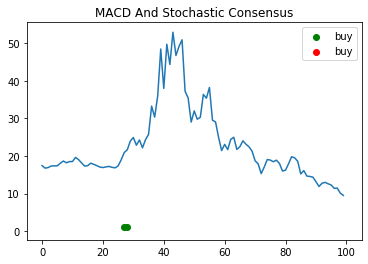

In [377]:
plt.figure()
plt.plot(df['close'])
plt.scatter(df.index, df['buyConsensus'],label='buy',marker='o', color='green')
plt.scatter(df.index, df['sellConsensus'],label='buy',marker='o', color='red')
plt.xlim([-5,105])
plt.title('MACD And Stochastic Consensus')
plt.legend()